In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# (ML algorithms + preprocessing)
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [7]:
df = pd.read_csv('card_fraud.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Date,Transaction_Time,Transaction_Location,Merchant_ID,Device_ID,Card_Type,Transaction_Currency,Transaction_Status,Previous_Transaction_Count,Distance_Between_Transactions_km,Time_Since_Last_Transaction_min,Authentication_Method,Transaction_Velocity,Transaction_Category,isFraud
0,1001,68389745,69635000,1/1/2024 0:00,0:00:00,Surkhandarya,6710,2060,UzCard,UZS,Successful,35,3481.19,30,2FA,5,Transfer,1
1,1002,42122340,53486000,1/1/2024 0:01,0:01:00,Namangan,6498,2797,UzCard,USD,Successful,35,4341.04,1073,Biometric,9,Cash Out,1
2,1003,87539955,24262000,1/1/2024 0:02,0:02:00,Navoiy,5039,2519,Humo,UZS,Reversed,25,4780.35,132,2FA,7,Cash In,1
3,1004,98657863,56019000,1/1/2024 0:03,0:03:00,Bukhara,6115,2641,Humo,UZS,Failed,44,719.43,41,Biometric,1,Payment,1
4,1005,88084360,87823000,1/1/2024 0:04,0:04:00,Andijan,5072,2923,Humo,UZS,Failed,21,4691.06,458,Password,8,Cash Out,1


In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Transaction_ID                    100000 non-null  int64  
 1   User_ID                           100000 non-null  int64  
 2   Transaction_Amount                100000 non-null  int64  
 3   Transaction_Date                  100000 non-null  object 
 4   Transaction_Time                  100000 non-null  object 
 5   Transaction_Location              100000 non-null  object 
 6   Merchant_ID                       100000 non-null  int64  
 7   Device_ID                         100000 non-null  int64  
 8   Card_Type                         100000 non-null  object 
 9   Transaction_Currency              100000 non-null  object 
 10  Transaction_Status                100000 non-null  object 
 11  Previous_Transaction_Count        100000 non-null  in

In [9]:
df.describe()

,Transaction_ID,User_ID,Transaction_Amount,Merchant_ID,Device_ID,Previous_Transaction_Count,Distance_Between_Transactions_km,Time_Since_Last_Transaction_min,Transaction_Velocity,isFraud
count,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,51000.500000,5.494949e+07,4.994914e+07,5999.333860,2500.863990,24.995050,2494.472941,719.954050,5.007310,0.500000
std,28867.657797,2.600718e+07,2.882889e+07,577.063768,288.964462,14.110348,1447.158281,414.434773,2.579051,0.500003
min,1001.000000,1.000056e+07,1.100000e+04,5001.000000,2001.000000,1.000000,0.010000,1.000000,1.000000,0.000000
25%,26000.750000,3.241005e+07,2.511300e+07,5500.000000,2250.000000,13.000000,1235.232500,362.000000,3.000000,0.000000
50%,51000.500000,5.486494e+07,4.979900e+07,6000.000000,2501.000000,25.000000,2497.550000,720.000000,5.000000,0.500000
75%,76000.250000,7.754587e+07,7.503175e+07,6499.000000,2751.000000,37.000000,3746.572500,1078.000000,7.000000,1.000000
max,101000.000000,9.999900e+07,1.000000e+08,7000.000000,3000.000000,49.000000,4999.980000,1439.000000,9.000000,1.000000


In [10]:
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Date                    0
Transaction_Time                    0
Transaction_Location                0
Merchant_ID                         0
Device_ID                           0
Card_Type                           0
Transaction_Currency                0
Transaction_Status                  0
Previous_Transaction_Count          0
Distance_Between_Transactions_km    0
Time_Since_Last_Transaction_min     0
Authentication_Method               0
Transaction_Velocity                0
Transaction_Category                0
isFraud                             0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:

# Class distribution
df['isFraud'].value_counts(), df['isFraud'].value_counts(normalize=True)

(isFraud
 1    50000
 0    50000
 Name: count, dtype: int64,
 isFraud
 1    0.5
 0    0.5
 Name: proportion, dtype: float64)

In [13]:
df = df.drop(['Transaction_ID', 'User_ID', 'Merchant_ID', 'Device_ID'], axis=1)

In [14]:
# Convert to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')
df['Transaction_Time'] = pd.to_timedelta(df['Transaction_Time'])

# Extract useful time-based features
df['Hour'] = df['Transaction_Time'].dt.seconds // 3600
df['Day'] = df['Transaction_Date'].dt.day
df['Month'] = df['Transaction_Date'].dt.month
df['Year'] = df['Transaction_Date'].dt.year

# Drop original columns
df = df.drop(['Transaction_Date', 'Transaction_Time'], axis=1)

In [15]:
numeric_cols = [
    'Transaction_Amount',
    'Previous_Transaction_Count',
    'Distance_Between_Transactions_km',
    'Time_Since_Last_Transaction_min',
    'Transaction_Velocity',
    'Hour', 'Day', 'Month', 'Year'
]

categorical_cols = [
    'Transaction_Location',
    'Card_Type',
    'Transaction_Currency',
    'Transaction_Status',
    'Authentication_Method',
    'Transaction_Category'
]

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [17]:

df

,Transaction_Amount,Transaction_Location,Card_Type,Transaction_Currency,Transaction_Status,Previous_Transaction_Count,Distance_Between_Transactions_km,Time_Since_Last_Transaction_min,Authentication_Method,Transaction_Velocity,Transaction_Category,isFraud,Hour,Day,Month,Year
0,69635000,Surkhandarya,UzCard,UZS,Successful,35,3481.19,30,2FA,5,Transfer,1,0,1,1,2024
1,53486000,Namangan,UzCard,USD,Successful,35,4341.04,1073,Biometric,9,Cash Out,1,0,1,1,2024
2,24262000,Navoiy,Humo,UZS,Reversed,25,4780.35,132,2FA,7,Cash In,1,0,1,1,2024
3,56019000,Bukhara,Humo,UZS,Failed,44,719.43,41,Biometric,1,Payment,1,0,1,1,2024
4,87823000,Andijan,Humo,UZS,Failed,21,4691.06,458,Password,8,Cash Out,1,0,1,1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39625000,Sirdarya,UzCard,USD,Failed,49,4750.85,732,Password,4,Transfer,0,10,10,3,2024
99996,4886000,Sirdarya,UzCard,USD,Successful,2,3419.73,1213,Biometric,5,Cash In,0,10,10,3,2024
99997,82030000,Sirdarya,UzCard,USD,Reversed,25,4561.11,1085,Biometric,1,Payment,0,10,10,3,2024
99998,91918000,Tashkent,Humo,UZS,Reversed,11,1851.69,445,2FA,1,Cash In,0,10,10,3,2024


In [27]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

In [28]:
# Create pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categorical_cols)
])
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb_model)
])

In [29]:

# Train
model_pipeline.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [30]:
# 📊 EVALUATION
# ==========================================
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

print("✅ Model Evaluation Metrics:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

✅ Model Evaluation Metrics:
[[9999    1]
 [   4 9996]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

ROC-AUC Score: 0.99999981


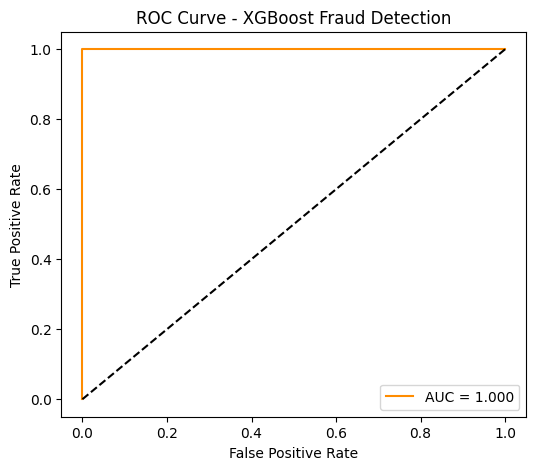

In [31]:

# 📈 ROC CURVE
# ==========================================
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc_score(y_test, y_prob):.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Fraud Detection')
plt.legend()
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC Scores:", scores)
print("Mean ROC-AUC:", scores.mean())

Cross-Validation ROC-AUC Scores: [1.       1.       1.       1.       0.818314]
Mean ROC-AUC: 0.9636627990000001


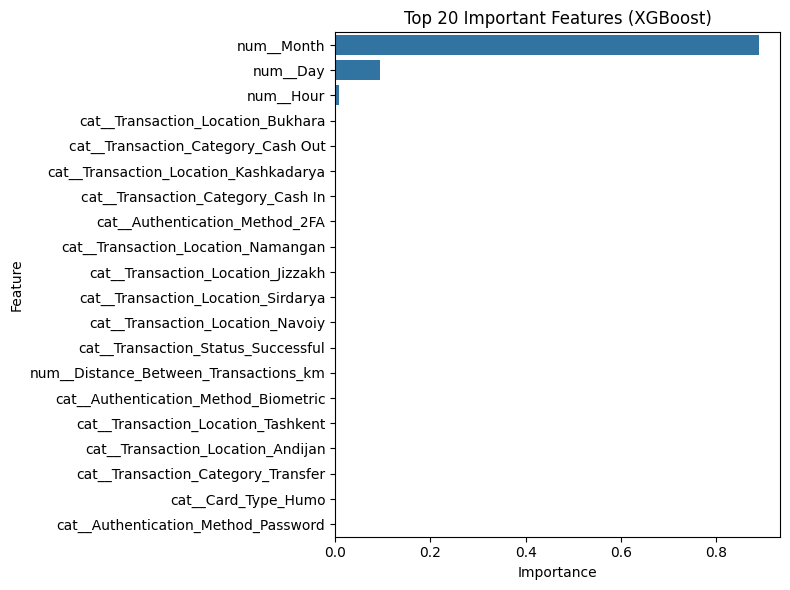

In [33]:
feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances = model_pipeline.named_steps['xgb'].feature_importances_

# Create DataFrame for plotting
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Top 20 Important Features (XGBoost)')
plt.tight_layout()
plt.show()


In [34]:
# Example single transaction data (replace with your values)
single_transaction = {
    'Transaction_Amount': 69635000,
    'Transaction_Location': 'Surkhandarya',
    'Card_Type': 'UzCard',
    'Transaction_Currency': 'UZS',
    'Transaction_Status': 'Successful',
    'Previous_Transaction_Count': 35,
    'Distance_Between_Transactions_km': 3481.19,
    'Time_Since_Last_Transaction_min': 30,
    'Authentication_Method': '2FA',
    'Transaction_Velocity': 5,
    'Transaction_Category': 'Transfer',
    'Hour': 00,
    'Day': 1,
    'Month': 1,
    'Year': 2024
}

# Convert to DataFrame
single_transaction_df = pd.DataFrame([single_transaction])

# Load the saved model
loaded_model = joblib.load("credit_fraud_xgboost.pkl")

# Predict fraud probability
fraud_probability = loaded_model.predict_proba(single_transaction_df)[:, 1]
is_fraud = loaded_model.predict(single_transaction_df)[0]

print(f"Fraud Probability: {fraud_probability[0]:.4f}")
print(f"Predicted as Fraud: {bool(is_fraud)}")

NameError: name 'joblib' is not defined

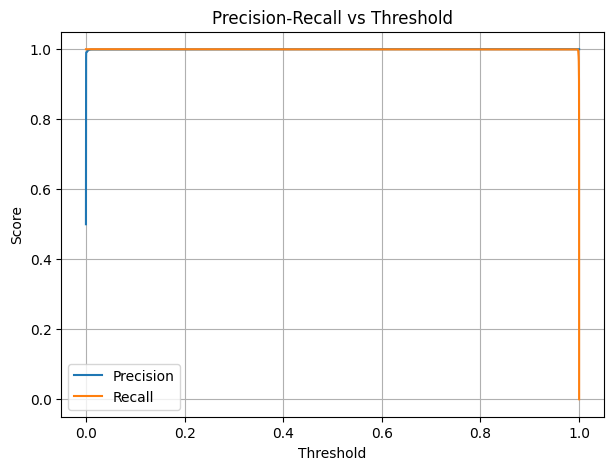

In [35]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score



# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot Precision vs Recall
plt.figure(figsize=(7,5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

In [36]:
import joblib
joblib.dump(model_pipeline, "credit_fraud_xgboost.pkl")
print(" Model saved as credit_fraud_xgboost.pkl")

 Model saved as credit_fraud_xgboost.pkl
